Importando bibliotecas e definindo parâmetros.

In [49]:
#Bibliotecas que serão utilizadas ao longo do exercício
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import odeint

#Parâmetros
l0 = 0.205 # comprimento do pendulo(m) 
m = 0.01122 # massa da esfera (kg)
ρ = 1 # densidade do ar (kg/m^3)
r = 0.007 # raio da esfera (m)
g = 10 # aceleração gravitacional (m/s^2)
Cd = 0.47 # coeficiente de arrasto (adimensional)
A = pi * (r ** 2)  #área da secção transversal da esfera (m^2)

#lista de tempo
t_lista = np.arange(0, 10, 0.004)  

#condições iniciais 

x_0 = 0.154
y_0 = -0.124
vx_0 = 0
vy_0 = 0


Implementando a função 'pendulo'.

In [50]:
def pendulo(a, t):
    x = a[0]
    y = a[1]
    vx = a[2]
    vy = a[3]
    v = sqrt(vx ** 2 + vy ** 2)
    if v > 0:
        cos_alpha = vx/v
        sen_alpha = vy/v
    else:
        sen_alpha = 0
        cos_alpha = 0
    sen_theta = x/l0
    cos_theta = -y/l0
    Fa = ρ * A * Cd * (v ** 2) * 0.5     # Força de resistência do ar ()
    T = m*v**2/l0 + m*g*cos_theta        #tração (N)
    dxdt = vx
    dydt = vy
    dvxdt = (-T * sen_theta - Fa * cos_alpha) / m
    dvydt = ( T * cos_theta - Fa * sen_alpha) / m - g
    dadt = [dxdt, dydt, dvxdt, dvydt]
    return dadt

Implementando o gráfico da trajetória.

In [51]:
a_0 = [x_0, y_0, vx_0, vy_0]
a_lista = odeint(pendulo, a_0, t_lista)

x = a_lista[:,0]
y = a_lista[:,1]
vx = a_lista[:,2]
vy = a_lista[:,3]

# plt.plot(x, y, label = "Modelo")
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Gráfico da trajetória')
# plt.grid(True)
# plt.show()

# plt.plot(t_lista, y)
# plt.xlabel('Tempo(s)')
# plt.ylabel('y')
# plt.title('Alcance em função do tempo')
# plt.grid(True)
# plt.show()

[[0.154, -0.124], [0.15396364244500405, -0.12405072190330689], [0.15385449853203034, -0.1242027913690352], [0.15367235956888106, -0.12445592571194779], [0.15341688418943353, -0.12480966015350306], [0.15308759039884126, -0.12526333298134665], [0.15268386542770493, -0.12581609350962836], [0.15220497287105872, -0.12646690555299858], [0.15165004753214484, -0.12721453077235859], [0.1510181104277282, -0.1280575399840114], [0.15030807416040554, -0.1289943095343994], [0.14951874923212255, -0.13002301702757324], [0.1486488533700348, -0.13114164036595985], [0.14769701989719342, -0.13234795626228182], [0.14666181133797881, -0.13363953795996075], [0.14554172782815114, -0.13501375456539738], [0.14433522030505844, -0.1364677696149802], [0.1430407033623787, -0.13799854029698808], [0.14165656923012582, -0.13960281724017334], [0.1401812019415459, -0.14127714468317354], [0.13861299243899178, -0.14301786131395255], [0.13695035432614322, -0.14482110189909378], [0.13519173956657668, -0.1466827991715158], [

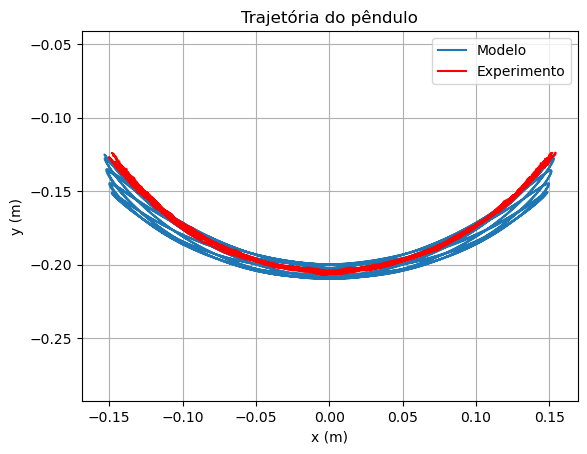

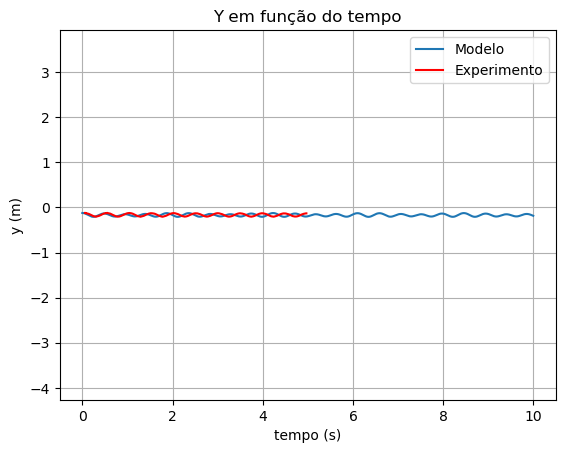

[[0.154, -0.124], [0.154, -0.124], [0.154, -0.125], [0.153, -0.126], [nan, nan], [0.152, -0.126], [0.152, -0.127], [0.151, -0.128], [0.151, -0.128], [0.15, -0.129], [0.149, -0.13], [0.148, -0.131], [0.147, -0.132], [0.146, -0.133], [0.145, -0.134], [0.144, -0.135], [0.143, -0.137], [0.141, -0.138], [0.139, -0.14], [0.138, -0.142], [0.136, -0.144], [0.134, -0.145], [0.132, -0.147], [0.131, -0.15], [0.129, -0.152], [0.126, -0.154], [0.124, -0.156], [0.122, -0.158], [0.12, -0.16], [0.117, -0.162], [0.114, -0.164], [0.112, -0.166], [0.108, -0.168], [0.106, -0.17], [0.102, -0.172], [0.09897, -0.175], [0.09575, -0.177], [0.09294, -0.179], [0.08958, -0.181], [0.08609, -0.183], [0.08247, -0.185], [0.07786, -0.187], [0.07381, -0.189], [0.07019, -0.191], [0.06615, -0.192], [0.06198, -0.194], [0.05753, -0.195], [0.05363, -0.196], [0.04931, -0.198], [0.0446, -0.199], [0.04042, -0.2], [0.03514, -0.202], [0.03111, -0.203], [0.02625, -0.204], [0.02154, -0.204], [0.01724, -0.205], [0.0128, -0.205], [0

In [55]:
import pandas

colunas = ['t', 'x', 'y', 'vx', 'vy']
dados = pandas.read_csv('experimento.csv', names =  colunas)

#dados do experimento
te = dados.t.tolist()
xe = dados.x.tolist()
ye = dados.y.tolist()
vxe = dados.vx.tolist()
vye = dados.vy.tolist()


plt.plot(x, y, label =  'Modelo')
plt.plot(xe, ye, 'r', label = "Experimento")
plt.title("Trajetória do pêndulo")
plt.legend()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.axis('equal')
plt.grid()
plt.show()

plt.plot(t_lista, y, label = 'Modelo')
plt.plot(te, ye, 'r', label = 'Experimento')
plt.xlabel('tempo (s)')
plt.ylabel('y (m)')
plt.legend()
plt.title('Y em função do tempo')
plt.grid(True)
plt.axis('equal')
plt.show()

pares_exp = []
for i in range(len(te)):
    pares_exp.append([xe[i], ye[i]])
    
pares = []
for i in range(len(x)):
    pares.append(['{0:.3f}, {1:.3f}'.format(x[i], y[i])])
    
    
print (pares_exp)
    
print(pares)